In [151]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [152]:
df = pd.read_csv("data/housing.csv", sep=",")

In [153]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [154]:
df.loc[:1000,["ocean_proximity"]]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
996,INLAND
997,INLAND
998,INLAND
999,INLAND


In [155]:
df[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [156]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

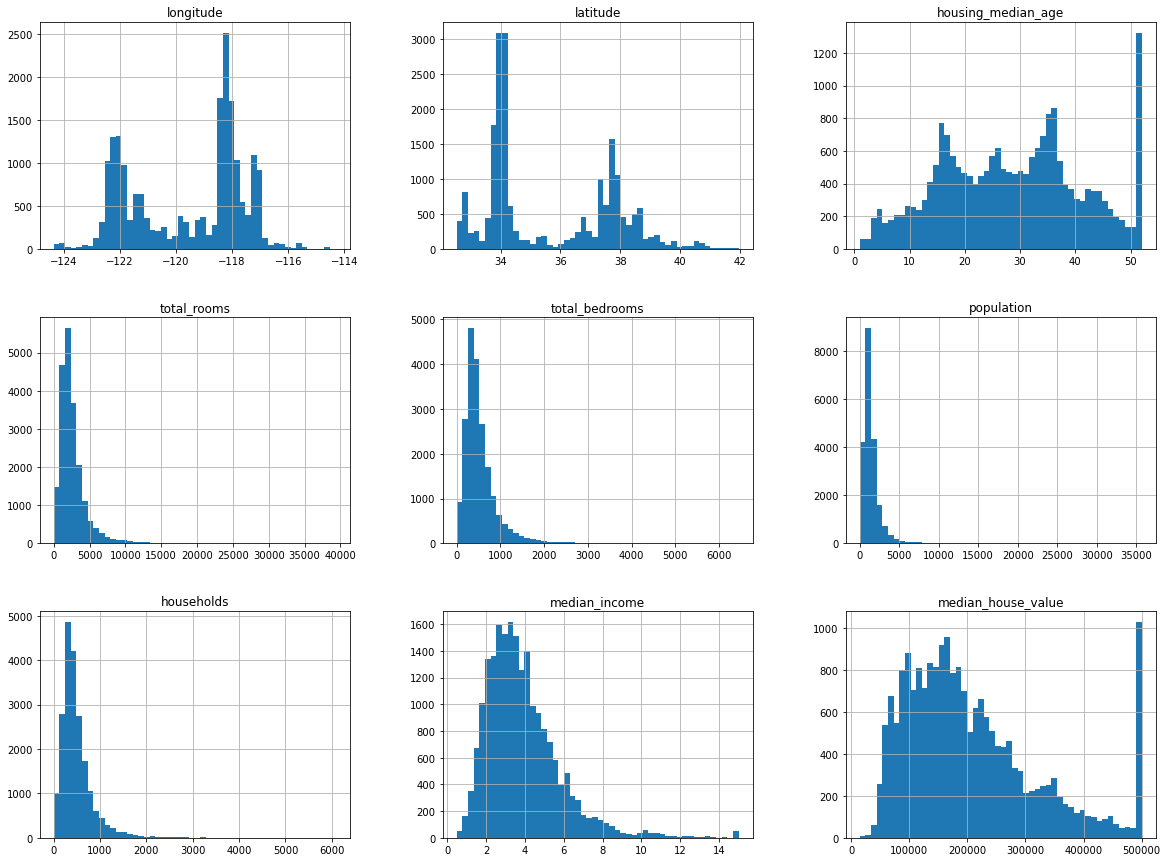

In [157]:
df.hist(bins=50, figsize=(20, 15))

In [158]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=list(range(1, 6)))

In [159]:
df[["income_cat"]].value_counts()

income_cat
3             7236
2             6581
4             3639
5             2362
1              822
dtype: int64

In [160]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["income_cat"])

In [161]:
train_set["Rooms_per_person"] = train_set["total_rooms"] / train_set["households"]
train_set["Bedrooms_per_person"] = train_set["total_bedrooms"] / train_set["households"]
train_set["Bedrooms_per_rooms"] = train_set["total_bedrooms"] / train_set["total_rooms"]

In [162]:
train_set["income_cat"].value_counts() / len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [163]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [164]:
for _set in [train_set, test_set]:
    _set.drop("income_cat", axis=1, inplace=True)

In [165]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Rooms_per_person',
       'Bedrooms_per_person', 'Bedrooms_per_rooms'],
      dtype='object')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

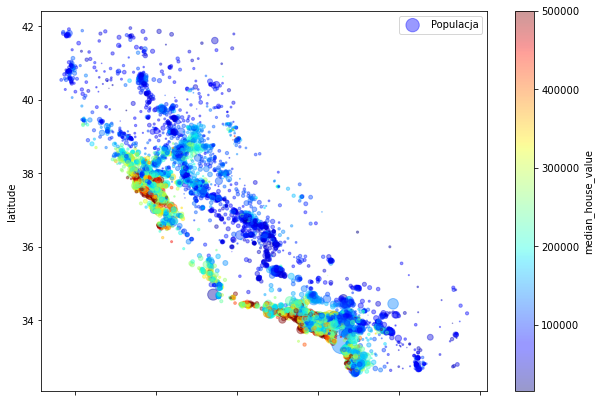

In [166]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=train_set["population"] / 100, label="Populacja", figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [167]:
corr_matrix = train_set.corr(method="spearman")

In [168]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.675714
Rooms_per_person       0.263373
total_rooms            0.204476
households             0.110722
total_bedrooms         0.084284
housing_median_age     0.083301
population             0.001309
longitude             -0.071562
Bedrooms_per_person   -0.126019
latitude              -0.162283
Bedrooms_per_rooms    -0.332589
Name: median_house_value, dtype: float64

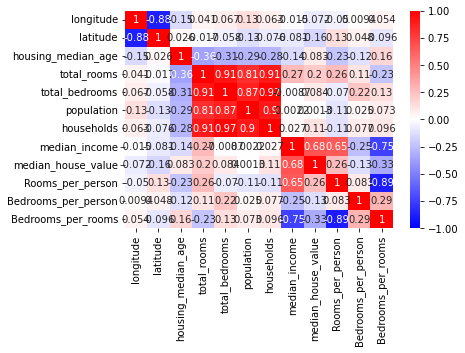

In [169]:
heatmap = sb.heatmap(corr_matrix, cmap=plt.get_cmap("bwr"), annot=True, vmin=-1, vmax=1)

In [170]:
attributes = [
 'housing_median_age',
 'total_rooms',
 'median_income',
 'median_house_value']

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

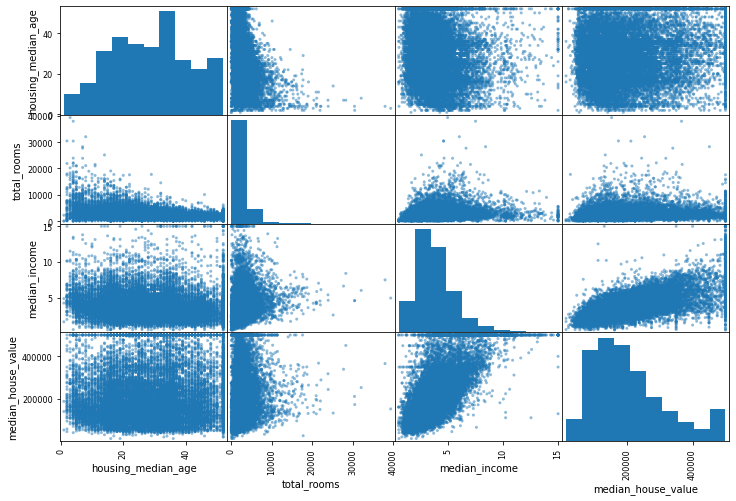

In [171]:
scatter_matrix(train_set[attributes], figsize=(12, 8))

In [173]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Rooms_per_person,Bedrooms_per_person,Bedrooms_per_rooms
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.012765,0.095645
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,0.070595,-0.116955
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,-0.075330,0.136768
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,0.026444,-0.192655
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.042778,0.086883
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,-0.068423,0.037736
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,-0.058382,0.067090
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.058923,-0.624650
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.043349,-0.259952
Rooms_per_person,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,0.863207,-0.398529
